### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df = pd.read_csv("data.csv")
df = df.dropna()
df.head(5)

,date,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df["mese_numerico"] = range(0,len(df.date))

m_values = df.mese_numerico.values.reshape(-1,1)
p_values = df.passengers.values

X_train, X_test, y_train, y_test = train_test_split(m_values, p_values, test_size=0.2, shuffle=False)

model_poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_poly2.fit(X_train, y_train)
y_pred_poly2 = model_poly2.predict(X_test)

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.mese_numerico,y=df.passengers, name='Actual Data'))

fig.add_trace(go.Scatter(x=, y=y_pred_poly2, name='Polynomial Regression'))

fig.update_layout(title="Passengers Over Time (Polynomial Regression)",
    xaxis_title="Time",
    yaxis_title="Passengers")

fig.show()

rmse = np.sqrt(np.mean((y_test - y_pred_poly2)**2))

print("RMSE: {}".format(rmse))

RMSE: 83.88179657702361


### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

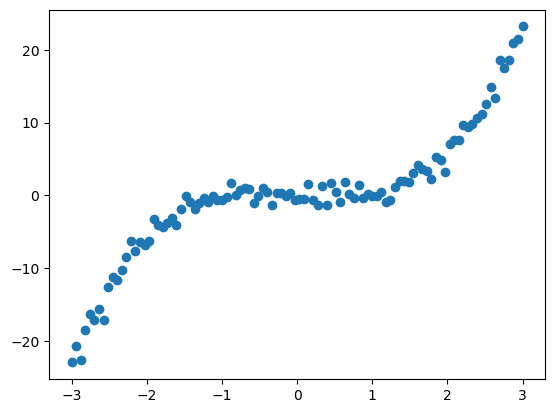

In [19]:
x = np.linspace(-3,3,100)
y = x**3 - x +np.random.normal(loc=0,scale=1,size=len(x))
plt.scatter(x,y)
